In [202]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [203]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import cv2
import os
import numpy as np
from PIL import Image

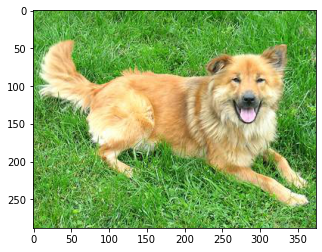

In [204]:
img=image.load_img('/content/sample_data/4.jpg')
plt.imshow(img)

In [205]:
cv2.imread('/content/drive/MyDrive/kaggle/train/dog4.jpg')

In [206]:
cv2.imread('/content/drive/MyDrive/kaggle/train/dog4.jpg')
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/kaggle/train/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/kaggle/validation/',target_size=(200,200),batch_size=3,class_mode='binary')
train_dataset.class_indices
train_dataset.classes


Found 34 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [207]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [208]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512,activation='relu'),

                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                ])

In [209]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

In [210]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=50,
                    validation_data=validation_dataset)

Epoch 1/50
5/5 [==============================] - 3s 397ms/step - loss: 2.0510 - accuracy: 0.4000
Epoch 2/50
5/5 [==============================] - 2s 311ms/step - loss: 1.0581 - accuracy: 0.6923
Epoch 3/50
5/5 [==============================] - 2s 320ms/step - loss: 0.5607 - accuracy: 0.6154
Epoch 4/50
5/5 [==============================] - 2s 386ms/step - loss: 0.5510 - accuracy: 0.8000
Epoch 5/50
5/5 [==============================] - 2s 380ms/step - loss: 0.5766 - accuracy: 0.8000
Epoch 6/50
5/5 [==============================] - 2s 318ms/step - loss: 0.4791 - accuracy: 0.8462
Epoch 7/50
5/5 [==============================] - 2s 380ms/step - loss: 0.5176 - accuracy: 0.8667
Epoch 8/50
5/5 [==============================] - 2s 387ms/step - loss: 0.4338 - accuracy: 0.8000
Epoch 9/50
5/5 [==============================] - 2s 315ms/step - loss: 0.3441 - accuracy: 0.9231
Epoch 10/50
5/5 [==============================] - 2s 376ms/step - loss: 0.1706 - accuracy: 0.8667
Epoch 11/50
5/5 [==

In [213]:
dir_path = '/content/drive/MyDrive/kaggle/test/'

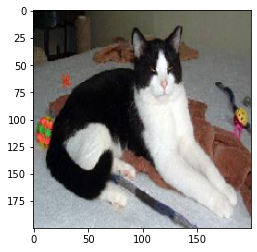

it's a cat


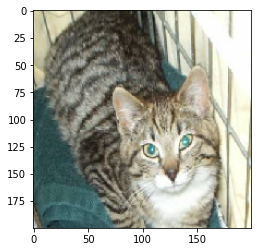

it's a cat


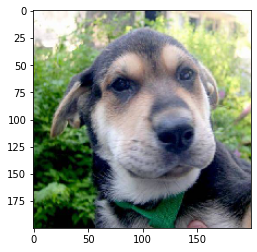

it's a cat


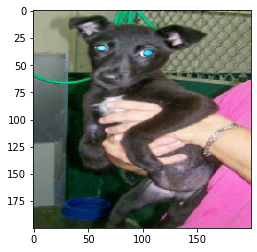

it's a cat


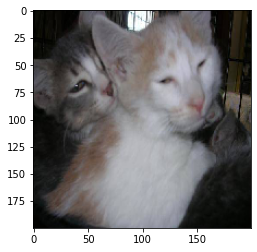

it's a dog


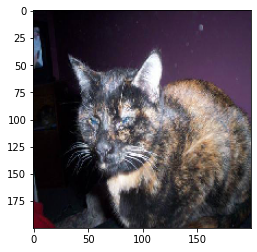

it's a cat


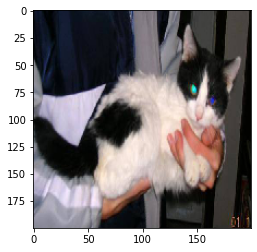

it's a dog


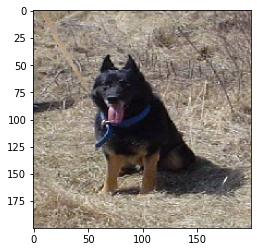

it's a dog


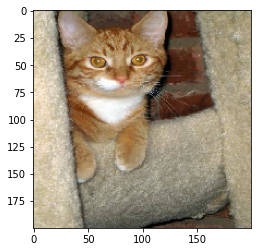

it's a dog


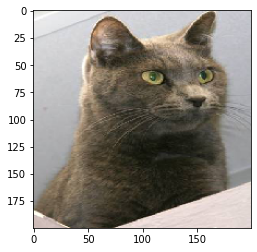

it's a dog


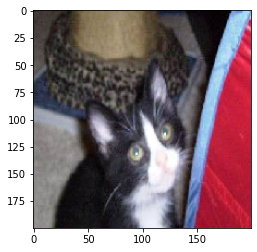

it's a cat


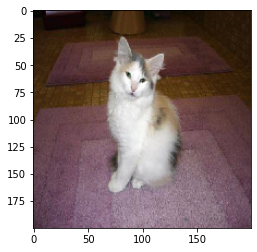

it's a dog


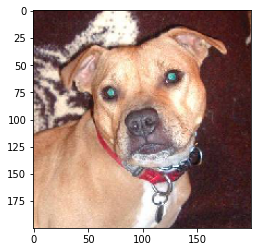

it's a dog


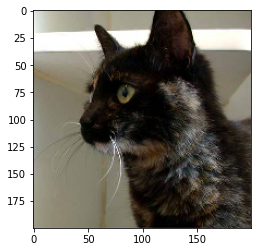

it's a cat


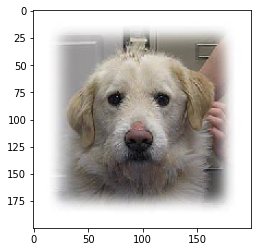

it's a dog


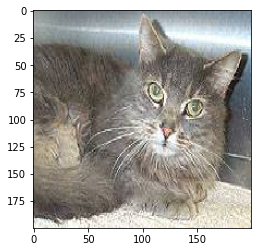

it's a dog


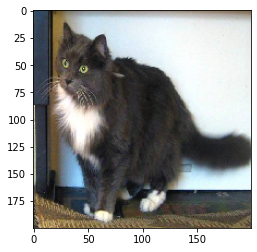

it's a cat


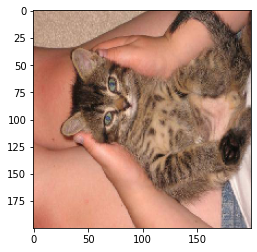

it's a dog


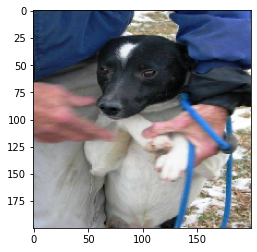

it's a dog


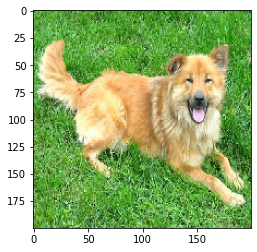

it's a cat


In [214]:
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+ i, target_size=(200,200)) 
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  if val==0:
     print("it's a cat")
  else:
     print("it's a dog")